In [ ]:
%pip install pandas
%pip install matplotlib
%pip install openpyxl
%pip install scipy
%pip install statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_excel('./italy_values_dataset.xlsx')
df.head()

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Agricultural raw materials exports (% of merch...,NaN,NaN,2.563660e+00,2.651714e+00,2.792923e+00,2.458821e+00,2.074765e+00,1.950177e+00,1.913135e+00,...,7.067187e-01,7.219625e-01,6.923116e-01,7.004827e-01,6.787235e-01,7.177904e-01,7.860897e-01,7.316264e-01,6.479517e-01,6.476411e-01
1,Agricultural raw materials imports (% of merch...,NaN,NaN,1.656606e+01,1.457160e+01,1.511533e+01,1.395485e+01,1.454314e+01,1.292804e+01,1.189546e+01,...,2.325614e+00,2.231932e+00,1.942749e+00,1.978887e+00,1.862372e+00,1.727109e+00,1.768343e+00,1.787668e+00,1.627784e+00,1.639572e+00
2,Rural population (% of total population),4.063900e+01,4.014400e+01,3.964500e+01,3.914700e+01,3.865000e+01,3.815700e+01,3.766600e+01,3.717800e+01,3.669100e+01,...,3.043500e+01,3.014500e+01,2.985600e+01,2.956200e+01,2.926400e+01,2.896100e+01,2.865400e+01,2.834300e+01,2.802700e+01,2.770800e+01
3,Rural population growth (annual %),NaN,-5.571391e-01,-5.741904e-01,-5.345537e-01,-4.550746e-01,-4.416493e-01,-5.178309e-01,-5.802878e-01,-6.868330e-01,...,-1.109249e+00,-1.147508e+00,-1.151428e+00,-7.459031e-01,-1.713177e+00,-1.527891e+00,-1.581309e+00,-1.293593e+00,-1.155401e+00,-1.157348e+00
4,Rural population,2.040066e+07,2.028731e+07,2.017116e+07,2.006362e+07,1.997252e+07,1.988451e+07,1.978181e+07,1.966735e+07,1.953273e+07,...,1.833088e+07,1.812173e+07,1.791427e+07,1.778115e+07,1.747912e+07,1.721409e+07,1.694402e+07,1.672624e+07,1.653410e+07,1.634385e+07


In [3]:
# CREO DATAFRAME DI LIVESTOCK PRODUCTION INDEX CON DUE COLONNE: YEAR E VALUE
df_livestock = (
    df[df["Indicator Name"] == "Livestock production index (2014-2016 = 100)"]
    .melt(id_vars=["Indicator Name"], var_name="Year", value_name="Value")
    .assign(Year=lambda d: d["Year"].astype(int))
    .dropna(subset=["Value"])
    [["Year", "Value"]]
    .reset_index(drop=True)
)
df_livestock.head()

,Year,Value
0,1961,70.91
1,1962,72.59
2,1963,65.95
3,1964,69.57
4,1965,72.80


historical mean (train 58 values): 98.4913559322034
MAPE (test 3 values): 5.984181918109523


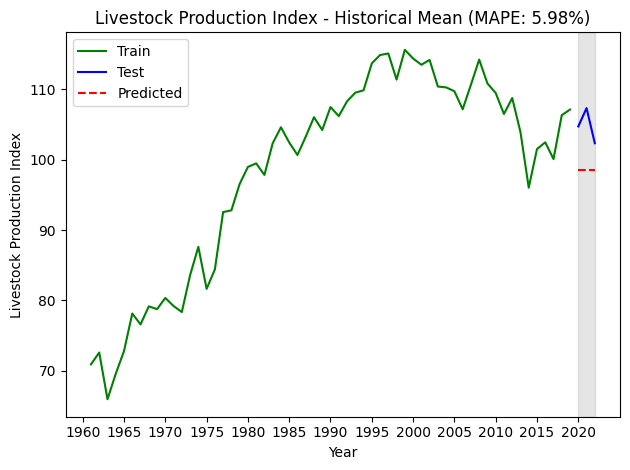

In [ ]:
# HISTORICAL MEAN BASELINE WITH MAPE EVALUATION
# LIVESTOCK PRODUCTION INDEX

train = df_livestock[:-3] # training set 1961-2019
test = df_livestock[-3:] # test set 2020-2022

historical_mean3 = np.mean(train['Value'])    
print("historical mean (train 58 values):", historical_mean3)
test.loc[:, 'pred_mean3'] = historical_mean3 # aggiunge colonna pred_mean con il valore della media storica

# definisco funzione MAPE che calcola l'errore percentuale assoluto medio
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape__hist_mean = mape(test['Value'], test['pred_mean3'])
print("MAPE (test 3 values):", mape__hist_mean)

# plot
fig, ax = plt.subplots()
ax.plot(train['Year'], train['Value'], 'g-', label='Train')
ax.plot(test['Year'], test['Value'], 'b-', label='Test')
ax.plot(test['Year'], test['pred_mean3'], 'r--', label='Predicted')
ax.set_title(f'Livestock Production Index - Historical Mean (MAPE: {mape__hist_mean:.2f}%)')
ax.set_xlabel('Year')
ax.set_ylabel('Livestock Production Index')
ax.axvspan(2020, 2022, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks(np.arange(1960, 2022, 5), [str(year) for year in np.arange(1960, 2022, 5)])
plt.tight_layout()

historical mean (train 53 values):  98.02703703703706
MAPE (test 8 values): 5.677015637827064


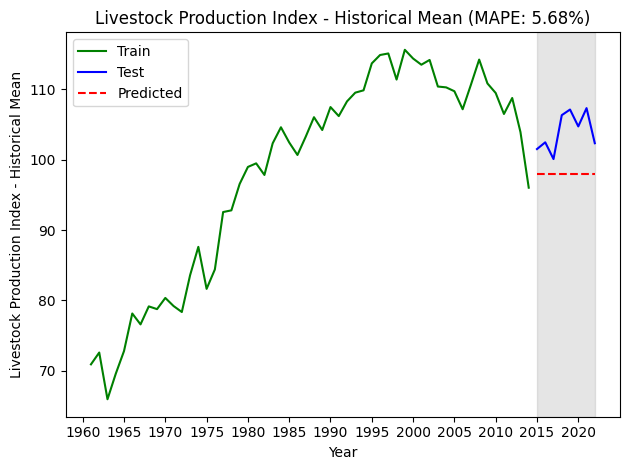

In [ ]:
# HISTORICAL MEAN BASELINE WITH MAPE EVALUATION
# LIVESTOCK PRODUCTION INDEX

train = df_livestock[:-8] # training set 1961-2014
test = df_livestock[-8:] # test set 2015-2022

historical_mean8 = np.mean(train['Value'])    
print("historical mean (train 53 values):", historical_mean8)

test.loc[:, 'pred_mean8'] = historical_mean8
mape__hist_mean = mape(test['Value'], test['pred_mean8'])
print("MAPE (test 8 values):", mape__hist_mean)

# plot
fig, ax = plt.subplots()
ax.plot(train['Year'], train['Value'], 'g-', label='Train')
ax.plot(test['Year'], test['Value'], 'b-', label='Test')
ax.plot(test['Year'], test['pred_mean8'], 'r--', label='Predicted')
ax.set_title(f'Livestock Production Index - Historical Mean (MAPE: {mape__hist_mean:.2f}%)')
ax.set_xlabel('Year')
ax.set_ylabel('Livestock Production Index - Historical Mean')
ax.axvspan(2015, 2022, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks(np.arange(1960, 2022, 5), [str(year) for year in np.arange(1960, 2022, 5)])
plt.tight_layout()

last_3year_mean: 104.51666666666667
MAPE: 1.650598361908317


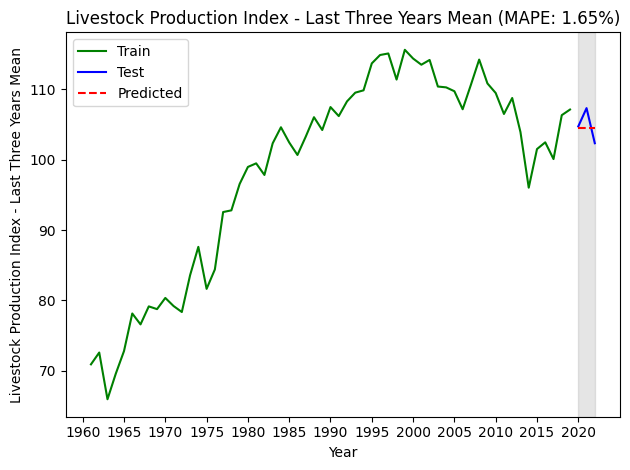

In [ ]:
# LAST 3 YEAR MEAN BASELINE WITH MAPE EVALUATION
# LIVESTOCK PRODUCTION INDEX

train = df_livestock[:-3] # training set 1961-2019
test = df_livestock[-3:] # test set 2020-2022

last_3year_mean = np.mean(train['Value'][-3:])
print("last_3year_mean:", last_3year_mean)
test.loc[:, 'pred__last_3yr_mean'] = last_3year_mean
mape__last_3year_mean = mape(test['Value'], test['pred__last_3yr_mean'])
print("MAPE:", mape__last_3year_mean)

# plot
fig, ax = plt.subplots()
ax.plot(train['Year'], train['Value'], 'g-', label='Train')
ax.plot(test['Year'], test['Value'], 'b-', label='Test')
ax.plot(test['Year'], test['pred__last_3yr_mean'], 'r--', label='Predicted')
ax.set_title(f'Livestock Production Index - Last Three Years Mean (MAPE: {mape__last_3year_mean:.2f}%)')
ax.set_xlabel('Year')
ax.set_ylabel('Livestock Production Index - Last Three Years Mean')
ax.axvspan(2020, 2022, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks(np.arange(1960, 2022, 5), [str(year) for year in np.arange(1960, 2022, 5)])
plt.tight_layout()

last value: 107.13
mape last: 2.386141674007021


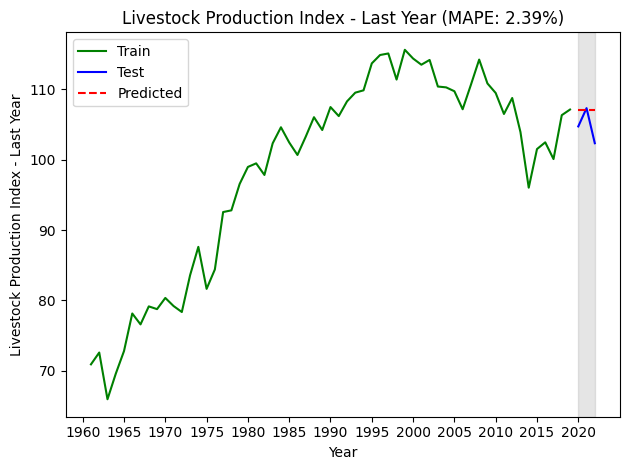

In [ ]:
# LAST YEAR
# LIVESTOCK PRODUCTION INDEX

last = train["Value"].iloc[-1]
print("last value:", last)
test.loc[:, 'pred__last'] = last
mape__last = mape(test['Value'], test['pred__last'])
print("mape last:", mape__last)

# plot
fig, ax = plt.subplots()
ax.plot(train['Year'], train['Value'], 'g-', label='Train')
ax.plot(test['Year'], test['Value'], 'b-', label='Test')
ax.plot(test['Year'], test['pred__last'], 'r--', label='Predicted')
ax.set_title(f'Livestock Production Index - Last Year (MAPE: {mape__last:.2f}%)')
ax.set_xlabel('Year')
ax.set_ylabel('Livestock Production Index - Last Year')
ax.axvspan(2020, 2022, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks(np.arange(1960, 2022, 5), [str(year) for year in np.arange(1960, 2022, 5)])
plt.tight_layout()

last_season: [100.09 106.33 107.13]
MAPE:  3.3475409916699332


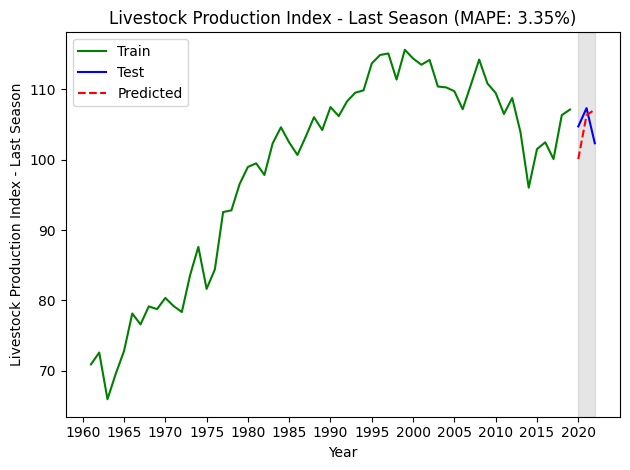

In [ ]:
# NAIVE SEASONAL FORECAST - replica gli ultimi 3 valori (ultima "stagione") + MAPE
# LIVESTOCK PRODUCTION INDEX

last_season = train['Value'][-3:].values
print("last_season:", last_season)
test.loc[:, 'pred__last_season'] = last_season
mape__naive_seasonal = mape(test['Value'], test['pred__last_season'])
print("MAPE: ", mape__naive_seasonal)

# plot
fig, ax = plt.subplots()
ax.plot(train['Year'], train['Value'], 'g-', label='Train')
ax.plot(test['Year'], test['Value'], 'b-', label='Test')
ax.plot(test['Year'], test['pred__last_season'], 'r--', label='Predicted')
ax.set_title(f'Livestock Production Index - Last Season (MAPE: {mape__naive_seasonal:.2f}%)')
ax.set_xlabel('Year')
ax.set_ylabel('Livestock Production Index - Last Season')
ax.axvspan(2020, 2022, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks(np.arange(1960, 2022, 5), [str(year) for year in np.arange(1960, 2022, 5)])
plt.tight_layout()

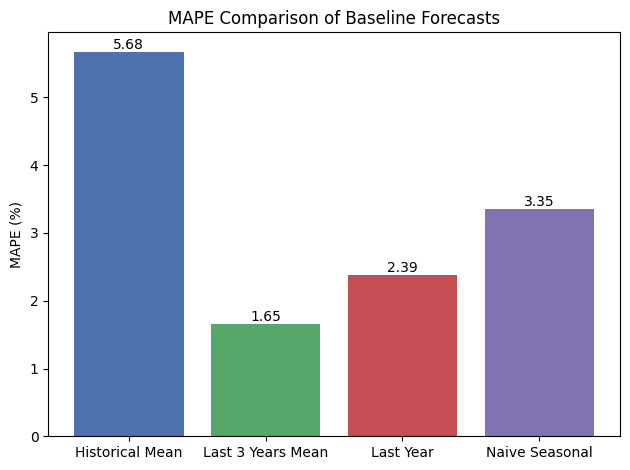

In [ ]:
# VISUALIZZAZIONE MAPE A CONFRONTO
mape_values = [
    mape__hist_mean,        # Historical mean
    mape__last_3year_mean,  # Last 3 years mean
    mape__last,             # Last year
    mape__naive_seasonal    # Naive seasonal
]
labels = [
    "Historical Mean",
    "Last 3 Years Mean",
    "Last Year",
    "Naive Seasonal"
]

# bar plot
fig, ax = plt.subplots()
ax.bar(labels, mape_values, color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])
ax.set_ylabel('MAPE (%)')
for i, v in enumerate(mape_values):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
ax.set_title('MAPE Comparison of Baseline Forecasts')
plt.tight_layout()
plt.show()